# Análise dos dados do ENEM 2022

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from tabulate import tabulate
import plotly.express as px
import seaborn as sns

In [2]:
# Ignorando todos os warnings
warnings.filterwarnings("ignore")

In [3]:
# Importando os dados do ENEM 2022
dadosEnem = pd.read_csv('MICRODADOS_ENEM_2022.csv', sep=';', encoding='ISO-8859-1')

In [4]:
# Visualizando os dados
dadosEnem.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210057943671,2022,14,M,2,2,1,1,2,1,...,B,A,A,A,A,A,A,A,A,A
1,210057516120,2022,14,M,2,1,1,1,16,1,...,E,E,B,E,B,B,E,B,E,B
2,210057280536,2022,5,F,1,2,1,1,2,1,...,A,A,A,A,A,A,C,A,A,B
3,210055724397,2022,6,M,1,3,1,1,2,1,...,B,A,A,C,A,A,C,B,B,B
4,210055097896,2022,4,M,0,3,1,1,1,1,...,A,A,A,A,A,A,B,A,A,A


In [5]:
# Visualizando as colunas existentes no dataframe
dadosEnem.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', '

## Parte 1 - Preparação dos Dados

In [6]:
# Selecionando apenas as colunas necessárias para a análise
colunasSelecionadas = ['NU_INSCRICAO', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO', 'Q001', 'Q002']

In [7]:
# Criando novo DataFrame contendo apenas as colunas necessárias para a análise
dadosEnemSelecionado = dadosEnem.filter(items=colunasSelecionadas)
dadosEnemSelecionado

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,Q001,Q002
0,210057943671,NaN,NaN,NaN,NaN,NaN,A,A
1,210057516120,NaN,NaN,NaN,NaN,NaN,D,D
2,210057280536,565.3,421.1,546.0,498.8,760.0,E,F
3,210055724397,416.0,490.7,388.6,357.8,320.0,C,A
4,210055097896,NaN,NaN,NaN,NaN,NaN,D,B
...,...,...,...,...,...,...,...,...
3476100,210056389903,NaN,NaN,NaN,NaN,NaN,D,E
3476101,210057205644,NaN,NaN,NaN,NaN,NaN,A,A
3476102,210056699189,637.1,527.9,627.0,583.3,660.0,E,C
3476103,210056983033,NaN,NaN,NaN,NaN,NaN,H,F


In [8]:
# Verificando colunas que possuem valores NA (not available)
dadosEnemSelecionado.isna().sum()

NU_INSCRICAO             0
NU_NOTA_MT         1120710
NU_NOTA_CN         1120710
NU_NOTA_CH          982663
NU_NOTA_LC          982663
NU_NOTA_REDACAO     982663
Q001                     0
Q002                     0
dtype: int64

In [9]:
# Retirando as linhas que possuem valores NA
dadosEnemSelecionado = dadosEnemSelecionado.dropna()

In [10]:
# Confirmando se os valores NA foram removidos do DataFrame
dadosEnemSelecionado.isna().sum()

NU_INSCRICAO       0
NU_NOTA_MT         0
NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
Q001               0
Q002               0
dtype: int64

- Vamos definir um dicionário que armazena as alternativas marcadas pelos candidatos e o significado de cada uma

- No dicionário dos microdados (planilha xlsx que mostra o que cada coluna do dataframe significa), as questões relativas a escolaridade do pai/mãe/responsável são as numeradas como Q001 e Q002

- As duas questões possuem as seguintes perguntas:
        
        Q001: Até que série seu pai, ou o homem responsável por você, estudou?

        Q002: Até que série sua mãe, ou a mulher responsável por você, estudou?

In [11]:
# Dicionário que armazena o significado de cada alternativa
q001eq002Dicionario = {'A': 'Nunca estudou',
                       'B': 'Não completou a 4ª série/5º ano do Ensino Fundamental',
                       'C': 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental',
                       'D': 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio',
                       'E': 'Completou o Ensino Médio, mas não completou a Faculdade',
                       'F': 'Completou a Faculdade, mas não completou a Pós-graduação',
                       'G': 'Completou a Pós-graduação',
                       'H': 'Não sei'
}

Vamos inserir uma nova coluna no DataFrame que contém a descrição da resposta para a questão Q001

In [12]:
# Inserindo coluna que relaciona a alternativa respondida para a questão 1 com seu significado
dadosEnemSelecionado['NO_Q001'] = [q001eq002Dicionario[resposta] for resposta in dadosEnemSelecionado.Q001]

In [13]:
# Inserindo coluna que relaciona a alternativa respondida para a questão 2 com seu significado
dadosEnemSelecionado['NO_Q002'] = [q001eq002Dicionario[resposta] for resposta in dadosEnemSelecionado.Q002]

In [14]:
# Visualizando o novo DataFrame
dadosEnemSelecionado.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,Q001,Q002,NO_Q001,NO_Q002
2,210057280536,565.3,421.1,546.0,498.8,760.0,E,F,"Completou o Ensino Médio, mas não completou a ...","Completou a Faculdade, mas não completou a Pós..."
3,210055724397,416.0,490.7,388.6,357.8,320.0,C,A,"Completou a 4ª série/5º ano, mas não completou...",Nunca estudou
7,210055778089,404.9,398.1,427.3,400.2,440.0,E,E,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ..."
9,210055461467,435.3,467.5,461.0,466.7,360.0,E,E,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ..."
11,210054972570,456.8,458.7,539.8,488.2,940.0,E,E,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ..."


## Parte 2 - Analisando o desempenho dos candidatos segundo a escolaridade do Pai

In [15]:
# Verificando a média das notas de cada uma das matérias segundo a escolaridade do pai
desempenho_mt = dadosEnemSelecionado.filter(items=['NU_NOTA_MT', 'Q001']).groupby('Q001').mean().sort_values(by='NU_NOTA_MT', ascending=False)
desempenho_cn = dadosEnemSelecionado.filter(items=['NU_NOTA_CN', 'Q001']).groupby('Q001').mean().sort_values(by='NU_NOTA_CN', ascending=False)
desempenho_ch = dadosEnemSelecionado.filter(items=['NU_NOTA_CH', 'Q001']).groupby('Q001').mean().sort_values(by='NU_NOTA_CH', ascending=False)
desempenho_lc = dadosEnemSelecionado.filter(items=['NU_NOTA_LC', 'Q001']).groupby('Q001').mean().sort_values(by='NU_NOTA_LC', ascending=False)
desempenho_redacao = dadosEnemSelecionado.filter(items=['NU_NOTA_REDACAO', 'Q001']).groupby('Q001').mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

╒═══════════════╤══════════════════════════════════════════════════════════════════════════════════════════╕
│ Alternativa   │ Significado                                                                              │
╞═══════════════╪══════════════════════════════════════════════════════════════════════════════════════════╡
│ A             │ 'Nunca estudou'                                                                          │
├───────────────┼──────────────────────────────────────────────────────────────────────────────────────────┤
│ B             │ 'Não completou a 4ª série/5º ano do Ensino Fundamental'                                  │
├───────────────┼──────────────────────────────────────────────────────────────────────────────────────────┤
│ C             │ 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental' │
├───────────────┼──────────────────────────────────────────────────────────────────────────────────────────┤
│ D             │ '

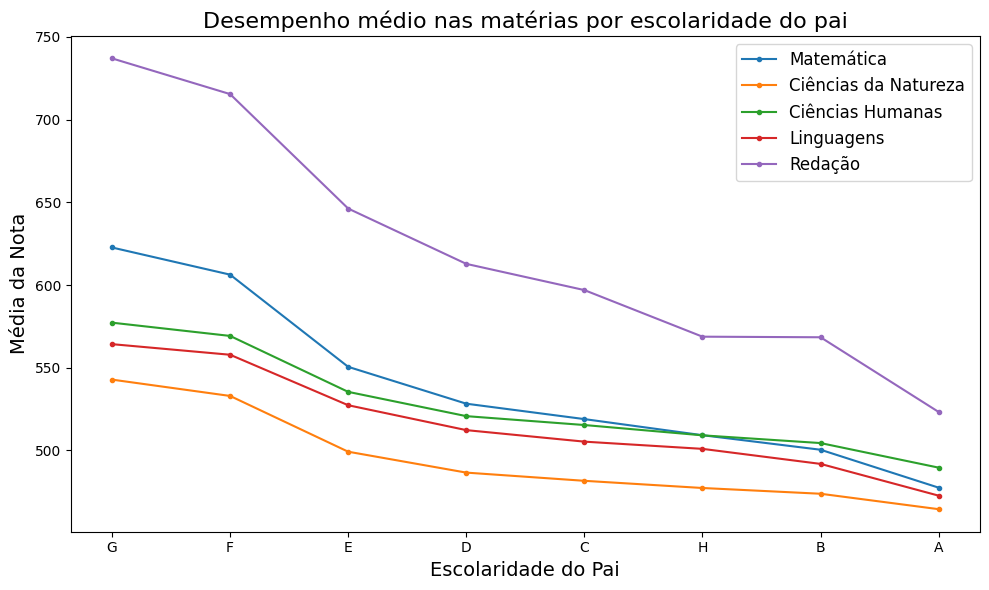

In [16]:
# Inserindo legenda para o significado das alternativas
texto_legenda = """
A: 'Nunca estudou'
B: 'Não completou a 4ª série/5º ano do Ensino Fundamental'
C: 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental'
D: 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio'
E: 'Completou o Ensino Médio, mas não completou a Faculdade'
F: 'Completou a Faculdade, mas não completou a Pós-graduação'
G: 'Completou a Pós-graduação'
H: 'Não sei'
"""

# Removendo espaços em branco no início e fim da string e divide a string 'texto_legenda' em uma lista de substrings, usando a quebra de linha \n como separador
linhas_legenda = texto_legenda.strip().split('\n')
# Separando as alternativas e seu significado em uma lista de tuplas
dados_legenda = [(linha.split(':')[0], linha.split(':')[1].strip()) for linha in linhas_legenda]
# Formatando a lista de tuplas 'dados_legenda' como uma tabela
print(tabulate(dados_legenda, headers=['Alternativa', 'Significado'], tablefmt='fancy_grid'))

# Construindo o gráfico que mostra o desempenho dos candidatos em cada uma das disciplinas
fig, ax = plt.subplots(figsize=(10, 6))

# Unindo todas as séries de dados em um único DataFrame
desempenho_completo = pd.concat([desempenho_mt, desempenho_cn, desempenho_ch, desempenho_lc, desempenho_redacao], axis=1)

# Plotando as linhas de cada série de dados
desempenho_completo.plot(ax=ax, marker='o', markersize=3)

# Adicionando título e rótulos aos eixos
ax.set_title('Desempenho médio nas matérias por escolaridade do pai', fontsize=16)
ax.set_xlabel('Escolaridade do Pai', fontsize=14)
ax.set_ylabel('Média da Nota', fontsize=14)

# Ajustando a posição da legenda
plt.legend(['Matemática', 'Ciências da Natureza', 'Ciências Humanas', 'Linguagens', 'Redação'], fontsize=12)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

O gráfico anterior nos mostra que as notas para todas as matérias crescem conforme cresce a escolaridade do Pai

## Parte 3 - Analisando a média do ENEM por município e considerando o Índice de Desenvolvimento Humano municipal (IDHM)

In [17]:
# Filtrando apenas as colunas necessárias para análise
dadosEnemSelecionado = dadosEnem.filter(items=['CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO'])
dadosEnemSelecionado.head()

,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,421.1,546.0,498.8,565.3,760.0
3,NaN,NaN,NaN,NaN,490.7,388.6,357.8,416.0,320.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Média das notas das disciplinas por município
# as_index=False: Desagrupa as colunas na tabela
mediaEnemPorMunicipio = dadosEnemSelecionado.groupby(['CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC'], as_index=False).mean()
mediaEnemPorMunicipio.head()

,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,1100015.0,Alta Floresta D'Oeste,11.0,RO,482.898551,521.657333,499.216000,534.992754,656.533333
1,1100023.0,Ariquemes,11.0,RO,487.737168,514.815818,504.606702,535.383186,613.351206
2,1100031.0,Cabixi,11.0,RO,464.870588,437.478947,429.742105,489.952941,436.842105
3,1100049.0,Cacoal,11.0,RO,488.037712,513.414600,506.028800,534.805297,602.280000
4,1100056.0,Cerejeiras,11.0,RO,487.975000,518.408696,490.573913,535.207500,609.565217


In [19]:
# Importando os dados de IDHM
atlasHumano = pd.read_csv('atlas-idhm.csv')
atlasHumano.head()

,ANO,UF,Codmun6,Codmun7,Município,LONG,LAT,Alt,ESPVIDA,FECTOT,...,PIA1517,PIA18M,POP,POPT,I_ESCOLARIDADE,I_FREQ_PROP,IDHM,IDHM_E,IDHM_L,IDHM_R
0,1991,RONDÔNIA,110001,1100015,ALTA FLORESTA D'OESTE,-61.999824,-11.935540,337.735719,62.01,4.08,...,NaN,NaN,23417,22835,0.117,0.109,0.329,0.112,0.617,0.516
1,1991,RONDÔNIA,110002,1100023,ARIQUEMES,-63.033269,-9.908463,138.688981,66.02,3.72,...,NaN,NaN,56061,55018,0.200,0.199,0.432,0.199,0.684,0.593
2,1991,RONDÔNIA,110003,1100031,CABIXI,-60.544314,-13.499763,236.063160,63.16,3.89,...,NaN,NaN,7601,5846,0.111,0.106,0.309,0.108,0.636,0.430
3,1991,RONDÔNIA,110004,1100049,CACOAL,-61.442944,-11.433865,177.453547,65.03,3.81,...,NaN,NaN,69173,66534,0.176,0.169,0.407,0.171,0.667,0.593
4,1991,RONDÔNIA,110005,1100056,CEREJEIRAS,-60.818426,-13.195033,262.811307,62.73,3.55,...,NaN,NaN,19451,19030,0.152,0.175,0.386,0.167,0.629,0.547


In [20]:
# Importando o DataFrame que mostra a latitude e longitude dos municipios
municipios = pd.read_csv('municipios.csv')
municipios.head()

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf,siafi_id,ddd,fuso_horario
0,5200050,Abadia de Goiás,-16.75730,-49.4412,0,52,1050,62,America/Sao_Paulo
1,3100104,Abadia dos Dourados,-18.48310,-47.3916,0,31,4001,34,America/Sao_Paulo
2,5200100,Abadiânia,-16.19700,-48.7057,0,52,9201,62,America/Sao_Paulo
3,3100203,Abaeté,-19.15510,-45.4444,0,31,4003,37,America/Sao_Paulo
4,1500107,Abaetetuba,-1.72183,-48.8788,0,15,401,91,America/Sao_Paulo


In [21]:
# Vamos juntar os DataFrames atlasHumano, que possui informações do IDHM e mediaEnemPorMunicio, que contém as notas de acordo com o município

# Primeiramente vamos separar apenas as colunas que serão utilizadas do DataFrame atlasHumano
colunasAtlas =['ANO', 'UF', 'Codmun6', 'Codmun7', 'Município', 'IDHM', 'IDHM_E', 'IDHM_L', 'IDHM_R']

# Redefinindo o DataFrame atlasHumano com as colunas necessárias para análise
atlasHumano = atlasHumano.filter(items=colunasAtlas)

# Juntando os dois DataFrames de interesse
mediaEnemIDHM = pd.merge(mediaEnemPorMunicipio, atlasHumano, how='left', left_on=['CO_MUNICIPIO_ESC'], right_on=['Codmun7'])
mediaEnemIDHM.head()

,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,ANO,UF,Codmun6,Codmun7,Município,IDHM,IDHM_E,IDHM_L,IDHM_R
0,1100015.0,Alta Floresta D'Oeste,11.0,RO,482.898551,521.657333,499.216000,534.992754,656.533333,1991.0,RONDÔNIA,110001.0,1100015.0,ALTA FLORESTA D'OESTE,0.329,0.112,0.617,0.516
1,1100015.0,Alta Floresta D'Oeste,11.0,RO,482.898551,521.657333,499.216000,534.992754,656.533333,2000.0,RONDÔNIA,110001.0,1100015.0,ALTA FLORESTA D'OESTE,0.483,0.262,0.698,0.617
2,1100015.0,Alta Floresta D'Oeste,11.0,RO,482.898551,521.657333,499.216000,534.992754,656.533333,2010.0,RONDÔNIA,110001.0,1100015.0,ALTA FLORESTA D'OESTE,0.641,0.526,0.763,0.657
3,1100023.0,Ariquemes,11.0,RO,487.737168,514.815818,504.606702,535.383186,613.351206,1991.0,RONDÔNIA,110002.0,1100023.0,ARIQUEMES,0.432,0.199,0.684,0.593
4,1100023.0,Ariquemes,11.0,RO,487.737168,514.815818,504.606702,535.383186,613.351206,2000.0,RONDÔNIA,110002.0,1100023.0,ARIQUEMES,0.556,0.343,0.742,0.674


In [22]:
# Agora vamos juntar os DataFrames 'municipios', que possui as informações de latitude e longitude e o 'mediaEnemIDHM'
enem_idhm_municipios = pd.merge(mediaEnemIDHM, municipios, how='left', left_on=['CO_MUNICIPIO_ESC'], right_on=['codigo_ibge'])
enem_idhm_municipios.head()

,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,ANO,...,IDHM_R,codigo_ibge,nome,latitude,longitude,capital,codigo_uf,siafi_id,ddd,fuso_horario
0,1100015.0,Alta Floresta D'Oeste,11.0,RO,482.898551,521.657333,499.216000,534.992754,656.533333,1991.0,...,0.516,1100015,Alta Floresta D'Oeste,-11.92830,-61.9953,0,11,33,69,America/Porto_Velho
1,1100015.0,Alta Floresta D'Oeste,11.0,RO,482.898551,521.657333,499.216000,534.992754,656.533333,2000.0,...,0.617,1100015,Alta Floresta D'Oeste,-11.92830,-61.9953,0,11,33,69,America/Porto_Velho
2,1100015.0,Alta Floresta D'Oeste,11.0,RO,482.898551,521.657333,499.216000,534.992754,656.533333,2010.0,...,0.657,1100015,Alta Floresta D'Oeste,-11.92830,-61.9953,0,11,33,69,America/Porto_Velho
3,1100023.0,Ariquemes,11.0,RO,487.737168,514.815818,504.606702,535.383186,613.351206,1991.0,...,0.593,1100023,Ariquemes,-9.90571,-63.0325,0,11,7,69,America/Porto_Velho
4,1100023.0,Ariquemes,11.0,RO,487.737168,514.815818,504.606702,535.383186,613.351206,2000.0,...,0.674,1100023,Ariquemes,-9.90571,-63.0325,0,11,7,69,America/Porto_Velho


<Axes: title={'center': 'Média da nota em Linguagens e Códigos'}, xlabel='longitude', ylabel='latitude'>

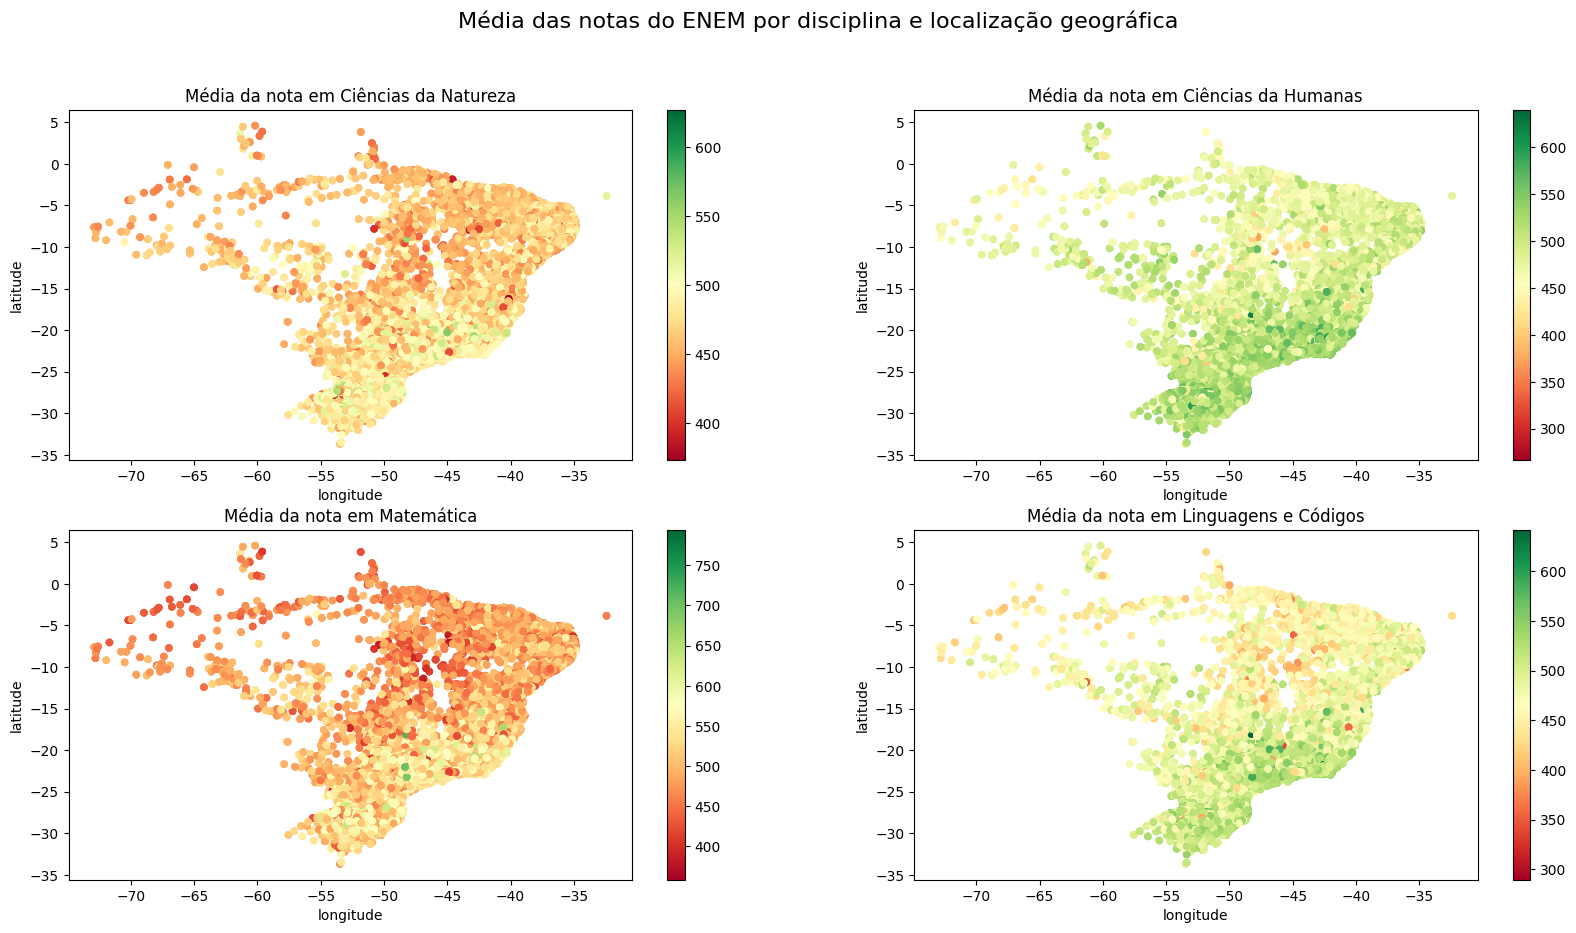

In [23]:
# Plotando as notas para as 4 disciplinas do ENEM no mapa do Brasil
fig, ax = plt.subplots(2,2, figsize=(20,10))

fig.suptitle('Média das notas do ENEM por disciplina e localização geográfica', fontsize=16)

enem_idhm_municipios.plot.scatter(y='latitude', x='longitude', c=enem_idhm_municipios['NU_NOTA_CN'], cmap='RdYlGn', title='Média da nota em Ciências da Natureza', ax=ax[0,0])
enem_idhm_municipios.plot.scatter(y='latitude', x='longitude', c=enem_idhm_municipios['NU_NOTA_CH'], cmap='RdYlGn', title='Média da nota em Ciências da Humanas', ax=ax[0,1])
enem_idhm_municipios.plot.scatter(y='latitude', x='longitude', c=enem_idhm_municipios['NU_NOTA_MT'], cmap='RdYlGn', title='Média da nota em Matemática', ax=ax[1,0])
enem_idhm_municipios.plot.scatter(y='latitude', x='longitude', c=enem_idhm_municipios['NU_NOTA_LC'], cmap='RdYlGn', title='Média da nota em Linguagens e Códigos', ax=ax[1,1])

<Axes: title={'center': 'Índice de Desenvolvimento Humano - Longevidade'}, xlabel='longitude', ylabel='latitude'>

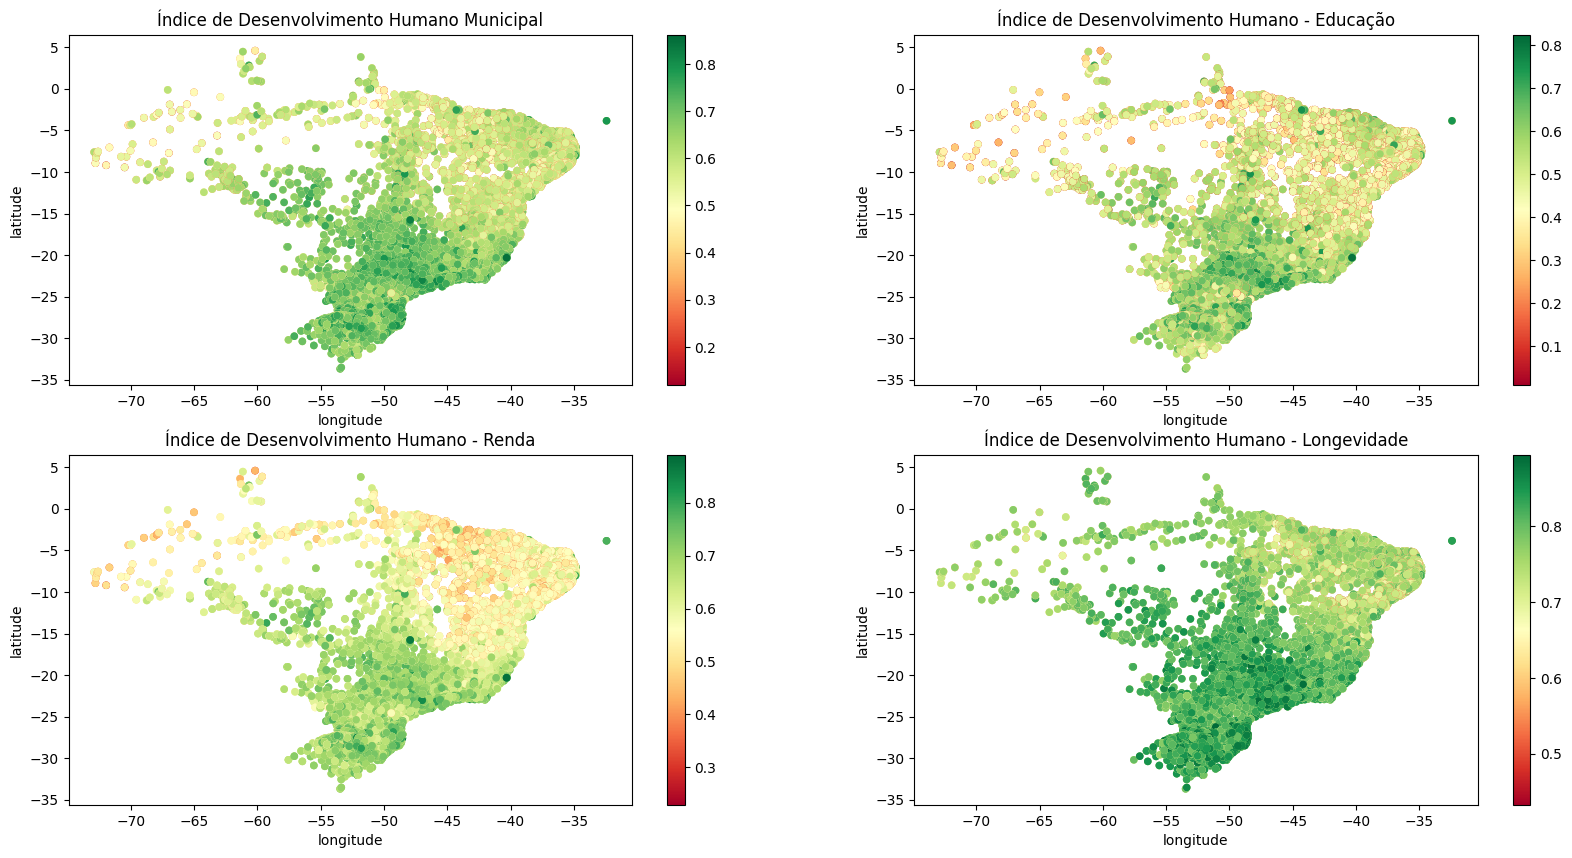

In [24]:
# Vamos plotar um gráfico similar mostrando os 4 tipos de IDHM no mapa brasileiro
fig, ax = plt.subplots(2,2, figsize=(20,10))

enem_idhm_municipios.plot.scatter(y='latitude', x='longitude', c=enem_idhm_municipios['IDHM'], cmap='RdYlGn', title='Índice de Desenvolvimento Humano Municipal', ax=ax[0,0])
enem_idhm_municipios.plot.scatter(y='latitude', x='longitude', c=enem_idhm_municipios['IDHM_E'], cmap='RdYlGn', title='Índice de Desenvolvimento Humano - Educação', ax=ax[0,1])
enem_idhm_municipios.plot.scatter(y='latitude', x='longitude', c=enem_idhm_municipios['IDHM_R'], cmap='RdYlGn', title='Índice de Desenvolvimento Humano - Renda', ax=ax[1,0])
enem_idhm_municipios.plot.scatter(y='latitude', x='longitude', c=enem_idhm_municipios['IDHM_L'], cmap='RdYlGn', title='Índice de Desenvolvimento Humano - Longevidade', ax=ax[1,1])

É possível observar nos gráficos anteriores que as maiores notas se concentram nas regiões Sul e Sudeste, o que pode ser explicado pelos maiores IDHMs nestas regiões, indicando que as mesmas possuem mais recursos, mais acesso à educação, informação, etc.

# Parte 4 - Analisando se existe correlação entre faixa etária e desempenho

## 4.1 - Analisando a correlação entre a representação numérica da faixa etária e a nota da redação

In [25]:
# Selecionando as colunas necessárias para a análise
dadosEnemRedacao = dadosEnem[['TP_FAIXA_ETARIA', 'NU_NOTA_REDACAO', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH']]
dadosEnemRedacao.head()

,TP_FAIXA_ETARIA,NU_NOTA_REDACAO,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH
0,14,NaN,NaN,NaN,NaN,NaN
1,14,NaN,NaN,NaN,NaN,NaN
2,5,760.0,498.8,565.3,421.1,546.0
3,6,320.0,357.8,416.0,490.7,388.6
4,4,NaN,NaN,NaN,NaN,NaN


In [26]:
# Excluindo linhas que possuem valores NaN
dadosEnemRedacao = dadosEnemRedacao.dropna().reset_index(drop=True)
dadosEnemRedacao.head()

,TP_FAIXA_ETARIA,NU_NOTA_REDACAO,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH
0,5,760.0,498.8,565.3,421.1,546.0
1,6,320.0,357.8,416.0,490.7,388.6
2,6,440.0,400.2,404.9,398.1,427.3
3,4,360.0,466.7,435.3,467.5,461.0
4,2,940.0,488.2,456.8,458.7,539.8


In [27]:
# Inserindo dicionário com legenda das respostas de idade

dic_idade = {
    1:'Menor de 17 anos',
    2:'17 anos',
    3:'18 anos',
    4:'19 anos',
    5:'20 anos',
    6:'21 anos',
    7:'22 anos',
    8:'23 anos',
    9:'24 anos',
    10:'25 anos',
    11:'Entre 26 e 30 anos',
    12:'Entre 31 e 35 anos',
    13:'Entre 36 e 40 anos',
    14:'Entre 41 e 45 anos',
    15:'Entre 46 e 50 anos',
    16:'Entre 51 e 55 anos',
    17:'Entre 56 e 60 anos',
    18:'Entre 61 e 65 anos',
    19:'Entre 66 e 70 anos',
    20:'Maior de 70 anos'
}


In [28]:
# Verificando a nota média em redação para cada grupo de idade

# Para isso, vamos filtrar as colunas necessárias
dadosEnemFaixaEtariaRedacao = dadosEnemRedacao[['TP_FAIXA_ETARIA', 'NU_NOTA_REDACAO']]
dadosEnemFaixaEtariaRedacao


,TP_FAIXA_ETARIA,NU_NOTA_REDACAO
0,5,760.0
1,6,320.0
2,6,440.0
3,4,360.0
4,2,940.0
...,...,...
2344818,12,580.0
2344819,11,740.0
2344820,2,580.0
2344821,11,520.0


In [29]:
dadosEnemFaixaEtariaRedacao = dadosEnemFaixaEtariaRedacao.groupby('TP_FAIXA_ETARIA').mean().reset_index()
dadosEnemFaixaEtariaRedacao

,TP_FAIXA_ETARIA,NU_NOTA_REDACAO
0,1,648.792447
1,2,647.099225
2,3,633.713881
3,4,634.250352
4,5,636.118357
5,6,635.373726
6,7,630.870177
7,8,620.189437
8,9,609.807145
9,10,598.905090


In [30]:
# Calculando a correlação entre as colunas TP_FAIXA_ETARIA e NU_NOTA_REDACAO
correlacao_redacao = dadosEnemFaixaEtariaRedacao['TP_FAIXA_ETARIA'].corr(dadosEnemFaixaEtariaRedacao['NU_NOTA_REDACAO'])

print("Correlação entre as colunas 'TP_FAIXA_ETARIA' e 'NU_NOTA_REDACAO':", correlacao_redacao)

Correlação entre as colunas 'TP_FAIXA_ETARIA' e 'NU_NOTA_REDACAO': -0.967278522134178


In [31]:
# Criando nova coluna 'faixa_etaria'
# Mapeando os valores do índice da tabela dadosEnemFaixaEtaria para os valores do dicionário dic_idade
dadosEnemFaixaEtariaRedacao['faixa_etaria'] = dadosEnemFaixaEtariaRedacao.index.map(dic_idade)

# Cria o gráfico de linha
grafico = px.line(dadosEnemFaixaEtariaRedacao, x='faixa_etaria', y='NU_NOTA_REDACAO')

# Definindo os nomes dos eixos
grafico.update_layout(
    xaxis_title= 'Faixa etária',
    yaxis_title= 'Média da nota da redação',
    title= 'Média da nota da redação por faixa etária',
    title_x=0.5,
    font=dict(
        size=14,
        color="black"
    ),
    xaxis_tickangle=-45
)

# Adicionando texto de anotaçõ ao lado do gráfico
grafico.add_annotation(
    xref='paper',
    yref='paper',
    x=1.,
    y=0.5,
    text=f'Correlação: {correlacao_redacao:.2f}',
    showarrow=False,
    font=dict(
        size=14,
        color="red"
    )
)

# Exibe o gráfico
grafico.show()


Percebe-se que há uma forte correlação linear negativa entre a representação numérica da coluna 'TP_FAIXA_ETARIA' e a coluna 'NU_NOTA_REDACAO', indicando que à medida que a a faixa etária dos participantes aumenta, a nota da redação diminui. 

Vale ressaltar que a correlação não indica causalidade, ou seja, não podemos concluir que a idade é a causa da variação nas notas da redação. Pode haver outras variáveis envolvidas que estão contribuindo para esta forte correlação negativa.

## 4.2 - Analisando a correlação entre a representação numérica da faixa etária e as notas de Ciências da Natureza, Ciências Humanas, Matemática e Linguagens

In [32]:
# Filtrando as colunas necessárias para análise
dadosEnemNotas = dadosEnem[['TP_FAIXA_ETARIA', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH']]
dadosEnemNotas.head()

,TP_FAIXA_ETARIA,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH
0,14,NaN,NaN,NaN,NaN
1,14,NaN,NaN,NaN,NaN
2,5,498.8,565.3,421.1,546.0
3,6,357.8,416.0,490.7,388.6
4,4,NaN,NaN,NaN,NaN


In [33]:
# Removendo as linhas que possuem valores NaN
dadosEnemNotas = dadosEnemNotas.dropna().reset_index(drop=True)
dadosEnemNotas.head()

,TP_FAIXA_ETARIA,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH
0,5,498.8,565.3,421.1,546.0
1,6,357.8,416.0,490.7,388.6
2,6,400.2,404.9,398.1,427.3
3,4,466.7,435.3,467.5,461.0
4,2,488.2,456.8,458.7,539.8


In [34]:
# Agrupando as notas pela faixa etária e calculando as médias para cada disciplina
notasAgrupadas = dadosEnemNotas.groupby('TP_FAIXA_ETARIA').mean().sort_values(by='TP_FAIXA_ETARIA', ascending=True).reset_index()
notasAgrupadas.head()


,TP_FAIXA_ETARIA,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH
0,1,522.531401,552.323293,491.397972,529.436824
1,2,521.539558,548.886961,495.862171,530.315916
2,3,517.090630,539.963981,493.089280,526.402300
3,4,518.853278,540.485904,495.728764,528.046493
4,5,521.955287,544.456510,500.294050,531.547698


In [35]:
notasAgrupadas['faixa_etaria'] = notasAgrupadas.index.map(dic_idade)

# Renomeando as colunas no DataFrame
notasAgrupadas.rename(columns={'NU_NOTA_LC': 'Língua Portuguesa', 'NU_NOTA_MT': 'Matemática',
                                'NU_NOTA_CN': 'Ciências da Natureza', 'NU_NOTA_CH': 'Ciências Humanas'},
                      inplace=True)

# Plotando o gráfico
grafico_notas = px.line(notasAgrupadas, x='faixa_etaria', y=['Língua Portuguesa', 'Matemática', 'Ciências da Natureza', 'Ciências Humanas'],
                        labels={'variable': 'Média da nota'})

# Definindo os nomes dos eixos
grafico_notas.update_layout(
    xaxis_title= 'Faixa etária',
    yaxis_title= 'Média da nota',
    title= 'Média da nota da disciplina por faixa etária',
    title_x=0.5,
    font=dict(
        size=14,
        color="black"
    ),
    xaxis_tickangle=-45
)


grafico_notas.show()

In [36]:
# Filtrando os dados para cálculo da correlação
dadosEnemNotasCorr = dadosEnem[['TP_FAIXA_ETARIA', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH']].dropna()
dadosEnemNotasCorr = dadosEnemNotasCorr.groupby('TP_FAIXA_ETARIA').mean().reset_index(drop=False)
dadosEnemNotasCorr

,TP_FAIXA_ETARIA,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH
0,1,522.531401,552.323293,491.397972,529.436824
1,2,521.539558,548.886961,495.862171,530.315916
2,3,517.090630,539.963981,493.089280,526.402300
3,4,518.853278,540.485904,495.728764,528.046493
4,5,521.955287,544.456510,500.294050,531.547698
5,6,524.436624,546.758412,503.967021,534.969119
6,7,525.918125,546.635828,504.621148,536.416725
7,8,525.441586,544.008733,504.008848,536.821635
8,9,525.681886,541.414040,503.433586,536.948566
9,10,525.485959,539.029921,502.714584,536.606754


In [37]:
# Calculando a correlação entre a coluna de faixa etaria e média das notas de cada disciplina

correlacaoLinguagens = dadosEnemNotasCorr['TP_FAIXA_ETARIA'].corr(dadosEnemNotasCorr['NU_NOTA_LC'])
print("Correlação entre a faixa etária e a média da nota em Linguagens =", correlacaoLinguagens)

correlacaoMatematica = dadosEnemNotasCorr['TP_FAIXA_ETARIA'].corr(dadosEnemNotasCorr['NU_NOTA_MT'])
print("Correlação entre a faixa etária e a média da nota em Matemática =", correlacaoMatematica)


correlacaoCienciasNatureza = dadosEnemNotasCorr['TP_FAIXA_ETARIA'].corr(dadosEnemNotasCorr['NU_NOTA_CN'])
print("Correlação entre a faixa etária e a média da nota em Ciências da Natureza =", correlacaoCienciasNatureza)


correlacaoCienciasHumanas = dadosEnemNotasCorr['TP_FAIXA_ETARIA'].corr(dadosEnemNotasCorr['NU_NOTA_CH'])
print("Correlação entre a faixa etária e a média da nota em Ciências Humanas =", correlacaoCienciasHumanas)

Correlação entre a faixa etária e a média da nota em Linguagens = -0.8303335958839717
Correlação entre a faixa etária e a média da nota em Matemática = -0.9313362491779449
Correlação entre a faixa etária e a média da nota em Ciências da Natureza = -0.6269355918173302
Correlação entre a faixa etária e a média da nota em Ciências Humanas = -0.5951789141565368


Percebe-se que a correlação mais forte entre a representação numérica da faixa etária e o desempenho é com a matéria de matemática.

Novamente, vale ressaltar que a correlação não indica causalidade.

<h2>Parte 4.3 - Heatmap entre as diferentes disciplinas</h2>

In [38]:
# Selecionando as colunas necessárias para análise
notasEnem = dadosEnem[['NU_NOTA_CN', 'NU_NOTA_REDACAO', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].dropna().reset_index(drop=True)
notasEnem.head()

,NU_NOTA_CN,NU_NOTA_REDACAO,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
0,421.1,760.0,546.0,498.8,565.3
1,490.7,320.0,388.6,357.8,416.0
2,398.1,440.0,427.3,400.2,404.9
3,467.5,360.0,461.0,466.7,435.3
4,458.7,940.0,539.8,488.2,456.8


In [39]:
# Alterando os nomes das colunas para criar o heatmap
notasEnem = notasEnem.rename(columns={
    'NU_NOTA_CN': 'Ciências da Natureza',
    'NU_NOTA_REDACAO': 'Redação',
    'NU_NOTA_CH': 'Ciências Humanas',
    'NU_NOTA_LC': 'Linguagens e Códigos',
    'NU_NOTA_MT': 'Matemática'
})

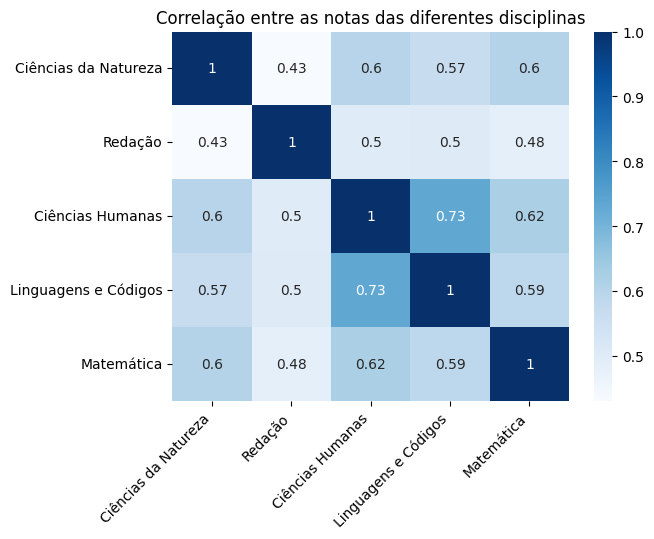

In [40]:
# Criando o heatmap
mapa_calor = sns.heatmap(notasEnem.corr(), annot=True, cmap='Blues')

# Modificando a inclinação dos nomes do eixo x
mapa_calor.set_xticklabels(mapa_calor.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('Correlação entre as notas das diferentes disciplinas')
plt.show()

<p>Pelo Heatmap anterior, percebe-se que a maior correlação é entre as notas de Ciências Humanas e Linguagens e a menor correlação é entre as notas de Redação e Ciências da Natureza</p>

<p>Vale ressaltar que esta correlação não indica causalidade, ou seja, uma nota não é consequência da outra. As duas apenas estão variando de forma similar.</p>

<h1>Parte 5 - Analisando o desempenho dos candidatos segundo a declaração de raça/cor</h1>

In [41]:
pd.set_option('display.max_columns', None)
dadosEnem.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210057943671,2022,14,M,2,2,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5300108,Brasília,53,DF,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,A,A,B,3,B,B,B,B,B,B,B,A,B,B,B,A,A,A,A,A,A,A,A,A
1,210057516120,2022,14,M,2,1,1,1,16,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5300108,Brasília,53,DF,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,E,E,3,Q,D,E,E,E,E,E,E,E,E,E,E,B,E,B,B,E,B,E,B
2,210057280536,2022,5,F,1,2,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2925758,Presidente Tancredo Neves,29,BA,1,1,1,1,1087.0,1056.0,1066.0,1078.0,421.1,546.0,498.8,565.3,DCDCEBADDABEDBCBEAEACCDDECEEBECBECAAECDDDDBCE,DBDABCADADECACBDCCEDACCCECDDABDCEADABCBCBAEAB,ABEABADCCADCAAAACDADDCECBAAACADABDEBCBCAAACEB,BDEBACECBCAEBABEDBABDACBCABCDEDEADBAABCBEACCD,1,DDECDBEACCAEBEAEBBCCDDCBDDACBEACEABCEABEDADBA,ECBABCDDAAECBCBECAEBAEACDEEDABBCDDEABCEDAAADB,DECDBDCEAADDBCABEDCAAADCCECEEBABEEAAABDBCCCABE...,BEEDAEABDDCEBDBAAAAACXCBCCCBCCDBDEECBDCABEECD,1.0,140.0,200.0,120.0,140.0,160.0,760.0,E,F,A,D,2,B,A,B,C,A,A,B,B,A,A,A,A,A,A,A,A,C,A,A,B
3,210055724397,2022,6,M,1,3,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3201308,Cariacica,32,ES,1,1,1,1,1088.0,1058.0,1067.0,1077.0,490.7,388.6,357.8,416.0,BACBBABBCAABCABBCBACBCBCBACABACABCBDBCBABAACA,BBCAACACDCABCBACCABABCBACBCABBBBBABCBACCBCBBA,ABACCCCBCBAADABBBACABBAABACCBCBBCDCACABABCAAC,BBBACCBABABBBBACDABBBBABCCBBCABBBBAACABBACBCB,1,DDCBBCCDDAADBAABEDABCEEAEBAEBECBDDEBEACCEACCD,CEDAAADBAECBCDDADEABCBECAEEDAEBABBCDECBABEACD,CDBEDACDEACAABDBDBDDCABEEECEABECABEEAAACBBEBAD...,CCCCBXCBABECBEABDDDBDECDBDCAACEECCEBDBAAAEDAE,1.0,120.0,40.0,40.0,100.0,20.0,320.0,C,A,A,B,3,A,A,C,D,A,A,B,A,B,A,B,A,A,C,A,A,C,B,B,B
4,210055097896,2022,4,M,0,3,1,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1506203,Salinópolis,15,PA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,B,A,B,2,B,A,B,B,A,A,B,A,A,A,A,A,A,A,A,A,B,A,A,A


In [42]:
# Legenda para código das respostas sobre cor/raça

dic_raca = {
    0: 'Não declarado',
    1: 'Branca', 
    2: 'Preta', 
    3: 'Parda', 
    4: 'Amarela', 
    5: 'Indígena'
}

In [43]:
# Selecionando as colunas necessárias para analise
dadosEnemRaca = dadosEnem[['TP_COR_RACA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].dropna().groupby('TP_COR_RACA').mean()
dadosEnemRaca

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
TP_COR_RACA,,,,,
0,495.410166,527.332935,515.119243,535.091099,598.824105
1,513.044949,549.585385,540.083535,573.545922,670.092009
2,478.204607,513.118135,504.106917,508.509919,587.579603
3,482.999491,514.456109,503.641473,519.707535,599.010280
4,497.565806,525.103887,514.039117,545.351978,619.999086
5,462.093423,484.676454,469.759476,480.195952,532.638728


In [44]:
# Criando nova coluna com significado das respostas de cor/raça
dadosEnemRaca['cor-raca'] = dadosEnemRaca.index.map(dic_raca)
dadosEnemRaca

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,cor-raca
TP_COR_RACA,,,,,,
0,495.410166,527.332935,515.119243,535.091099,598.824105,Não declarado
1,513.044949,549.585385,540.083535,573.545922,670.092009,Branca
2,478.204607,513.118135,504.106917,508.509919,587.579603,Preta
3,482.999491,514.456109,503.641473,519.707535,599.010280,Parda
4,497.565806,525.103887,514.039117,545.351978,619.999086,Amarela
5,462.093423,484.676454,469.759476,480.195952,532.638728,Indígena


In [45]:
# 'Derretendo' as colunas de notas para transformá-las em uma única coluna
dadosEnemRaca_melted = dadosEnemRaca.set_index('cor-raca').reset_index().melt(id_vars=['cor-raca'], var_name='Disciplina', value_name='Média da Nota')

# Mapeando os novos nomes das disciplinas
mapeamento_disciplinas = {
    'NU_NOTA_CN': 'Ciências da Natureza',
    'NU_NOTA_CH': 'Ciências Humanas',
    'NU_NOTA_LC': 'Linguagens e Códigos',
    'NU_NOTA_MT': 'Matemática',
    'NU_NOTA_REDACAO': 'Redação'
}

# Modificando a coluna 'Disciplina' de acordo com o mapeamento
dadosEnemRaca_melted['Disciplina'] = dadosEnemRaca_melted['Disciplina'].replace(mapeamento_disciplinas)

# Plotando o gráfico de barras empilhadas
grafico_raca = px.bar(dadosEnemRaca_melted, x='Disciplina', y='Média da Nota', color='cor-raca',
                           barmode='group', labels={'cor-raca': 'Cor/Raça', 'Média da Nota': 'Média das Notas', 'Disciplina': 'Disciplina'})

# Adicionar título e rótulos dos eixos
grafico_raca.update_layout(
    title='Média das notas do ENEM segundo autodeclaração de Cor/Raça',
    xaxis_title='Disciplina',
    yaxis_title='Média das Notas'
)

grafico_raca.update_layout(
    plot_bgcolor='rgba(1,1,1,0.06)',
    paper_bgcolor='white',
    font_color='black'
)

# Exibir o gráfico
grafico_raca.show()

<p>Pelo gráfico acima, percebe-se que as maiores notas para todas as disciplinas são de pessoas autodeclaradas brancas. Em contrapartida, as menores notas para todas as disciplinas são de pessoas autodeclaradas indígenas</p>

<h1>Parte 6 - Desempenho do candidato segundo tipo de escola</h1>

In [46]:
# Dicionário com os significas das respotas

dicTipoEscola = {
    1: 'Não respondeu',
    2: 'Pública', 
    3: 'Privada'
}

In [47]:
dadosEnemTipoEscola = dadosEnem[['TP_ESCOLA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].dropna().groupby('TP_ESCOLA').mean().reset_index()
dadosEnemTipoEscola

,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,1,499.371168,534.961390,524.691904,546.935009,632.791581
1,2,478.942990,509.462208,500.981712,515.841803,589.390092
2,3,538.367604,574.041750,558.974443,615.600466,754.767724


In [48]:
dadosEnemTipoEscola['TipoEscola'] = dadosEnemTipoEscola['TP_ESCOLA'].map(dicTipoEscola)
dadosEnemTipoEscola

,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TipoEscola
0,1,499.371168,534.961390,524.691904,546.935009,632.791581,Não respondeu
1,2,478.942990,509.462208,500.981712,515.841803,589.390092,Pública
2,3,538.367604,574.041750,558.974443,615.600466,754.767724,Privada


In [49]:
# 'Derretendo' as colunas de notas para transformá-las em uma única coluna
dadosEnemTipoEscola_melted = dadosEnemTipoEscola.drop('TP_ESCOLA', axis=1).melt(id_vars=['TipoEscola'], var_name='Disciplina', value_name='Média da Nota')

# Modificando a coluna 'Disciplina' de acordo com o mapeamento
dadosEnemTipoEscola_melted['Disciplina'] = dadosEnemTipoEscola_melted['Disciplina'].replace(mapeamento_disciplinas)

# Plotando o gráfico de barras empilhadas
grafico_tipo_escola = px.bar(dadosEnemTipoEscola_melted, x='Disciplina', y='Média da Nota', color='TipoEscola',
                           barmode='group', labels={'TipoEscola': 'Tipo de Escola', 'Média da Nota': 'Média das Notas', 'Disciplina': 'Disciplina'})

# Adicionando título e rótulos dos eixos
grafico_tipo_escola.update_layout(
    title='Média das notas do ENEM por tipo de escola',
    xaxis_title='Disciplina',
    yaxis_title='Média das Notas'
)

grafico_tipo_escola.update_layout(
    plot_bgcolor='rgba(1,1,1,0.06)',
    paper_bgcolor='white',
    font_color='black'
)

# Exibir o gráfico
grafico_tipo_escola.show()

<p>Pelo gráfico anterior, percebe-se que as médias das maiores notas de todas as disciplinas são maiores para candidatos de escolas privadas, enquanto as menores são de candidatos de escolas públicas.

<h1>Parte 7 - Desempenho dos candidatos segundo sexo</h1>

In [50]:
dadosEnem.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210057943671,2022,14,M,2,2,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5300108,Brasília,53,DF,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,A,A,B,3,B,B,B,B,B,B,B,A,B,B,B,A,A,A,A,A,A,A,A,A
1,210057516120,2022,14,M,2,1,1,1,16,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5300108,Brasília,53,DF,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,E,E,3,Q,D,E,E,E,E,E,E,E,E,E,E,B,E,B,B,E,B,E,B
2,210057280536,2022,5,F,1,2,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2925758,Presidente Tancredo Neves,29,BA,1,1,1,1,1087.0,1056.0,1066.0,1078.0,421.1,546.0,498.8,565.3,DCDCEBADDABEDBCBEAEACCDDECEEBECBECAAECDDDDBCE,DBDABCADADECACBDCCEDACCCECDDABDCEADABCBCBAEAB,ABEABADCCADCAAAACDADDCECBAAACADABDEBCBCAAACEB,BDEBACECBCAEBABEDBABDACBCABCDEDEADBAABCBEACCD,1,DDECDBEACCAEBEAEBBCCDDCBDDACBEACEABCEABEDADBA,ECBABCDDAAECBCBECAEBAEACDEEDABBCDDEABCEDAAADB,DECDBDCEAADDBCABEDCAAADCCECEEBABEEAAABDBCCCABE...,BEEDAEABDDCEBDBAAAAACXCBCCCBCCDBDEECBDCABEECD,1.0,140.0,200.0,120.0,140.0,160.0,760.0,E,F,A,D,2,B,A,B,C,A,A,B,B,A,A,A,A,A,A,A,A,C,A,A,B
3,210055724397,2022,6,M,1,3,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3201308,Cariacica,32,ES,1,1,1,1,1088.0,1058.0,1067.0,1077.0,490.7,388.6,357.8,416.0,BACBBABBCAABCABBCBACBCBCBACABACABCBDBCBABAACA,BBCAACACDCABCBACCABABCBACBCABBBBBABCBACCBCBBA,ABACCCCBCBAADABBBACABBAABACCBCBBCDCACABABCAAC,BBBACCBABABBBBACDABBBBABCCBBCABBBBAACABBACBCB,1,DDCBBCCDDAADBAABEDABCEEAEBAEBECBDDEBEACCEACCD,CEDAAADBAECBCDDADEABCBECAEEDAEBABBCDECBABEACD,CDBEDACDEACAABDBDBDDCABEEECEABECABEEAAACBBEBAD...,CCCCBXCBABECBEABDDDBDECDBDCAACEECCEBDBAAAEDAE,1.0,120.0,40.0,40.0,100.0,20.0,320.0,C,A,A,B,3,A,A,C,D,A,A,B,A,B,A,B,A,A,C,A,A,C,B,B,B
4,210055097896,2022,4,M,0,3,1,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1506203,Salinópolis,15,PA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,B,A,B,2,B,A,B,B,A,A,B,A,A,A,A,A,A,A,A,A,B,A,A,A


In [51]:
dadosEnemSexo = dadosEnem[['TP_SEXO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].dropna().groupby('TP_SEXO').mean().reset_index()
dadosEnemSexo

,TP_SEXO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,F,488.478663,525.790145,519.092356,526.702268,639.522367
1,M,507.941966,536.578920,521.117842,567.778466,612.225006


In [53]:
# 'Derretendo' as colunas de notas para transformá-las em uma única coluna
dadosEnemSexo_melted = dadosEnemSexo.melt(id_vars=['TP_SEXO'], var_name='Disciplina', value_name='Média da Nota')

dadosEnemSexo_melted['Disciplina'] = dadosEnemSexo_melted['Disciplina'].replace(mapeamento_disciplinas)

# Plotando o gráfico de barras empilhadas
grafico_tipo_sexo = px.bar(dadosEnemSexo_melted, x='Disciplina', y='Média da Nota', color='TP_SEXO',
                           barmode='group', labels={'TP_SEXO': 'Sexo', 'Média da Nota': 'Média das Notas', 'Disciplina': 'Disciplina'})

# Adicionar título e rótulos dos eixos
grafico_tipo_sexo.update_layout(
    title='Média das notas do ENEM por sexo e disciplina',
    xaxis_title='Disciplina',
    yaxis_title='Média das Notas'
)

# Adicionando título e rótulos dos eixos
grafico_tipo_sexo.update_layout(
    title='Média das notas do ENEM por tipo de sexo',
    xaxis_title='Disciplina',
    yaxis_title='Média das Notas'
)

grafico_tipo_sexo.update_layout(
    plot_bgcolor='rgba(1,1,1,0.06)',
    paper_bgcolor='white',
    font_color='black'
)

# Exibir o gráfico
grafico_tipo_sexo.show()



Pelo gráfico anterior, percebe-se que, de maneira geral, pessoas que se declaram com o gênero masculino, possui desempenho médio superior a pessoas que se declaram com o sexo feminino para todas as matérias, exceto em Redação.